# Desafio Ciência de Dados - Indicium Lighthouse
Análise de um conjunto de filmes e construção de um modelo preditivo para estimar a nota do IMDb.

In [1]:
# permissão para acessar algum arquivo do Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## 1. Descrição inicial




In [3]:
import pandas as pd

# leitura do dataset
data = pd.read_csv("drive/My Drive/Indicium Lighthouse/desafio_indicium_imdb.csv", index_col=0) # remove coluna "Unnamed:0"

# primeiras 5 instâncias
data.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


#### Descrição rápida dos dados

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 124.9+ KB


In [5]:
# aumentando a capacidade de visualização de linhas
pd.set_option('display.max_rows',1000)

#### Quantidade de categorias nos atributos categóricos

In [6]:
# descobrindo quantas categorias existem nos atributos categóricos/textuais
data.Series_Title.nunique()
print("quantidade de categorias em Series_Title = ", data.Series_Title.nunique())

data.Released_Year.nunique()
print("quantidade de categorias em Released_Year = ", data.Released_Year.nunique())

data.Certificate.nunique()
print("quantidade de categorias em Certificate = ", data.Certificate.nunique())

data.Runtime.nunique()
print("quantidade de categorias em Runtime = ", data.Runtime.nunique())

data.Genre.nunique()
print("quantidade de categorias em Genre = ", data.Genre.nunique())

data.Overview.nunique()
print("quantidade de categorias em Overview = ", data.Overview.nunique())

data.Director.nunique()
print("quantidade de categorias em Director = ", data.Director.nunique())

data.Star1.nunique()
print("quantidade de categorias em Star1 = ", data.Star1.nunique())

data.Star2.nunique()
print("quantidade de categorias em Star2 = ", data.Star2.nunique())

data.Star3.nunique()
print("quantidade de categorias em Star3 = ", data.Star3.nunique())

data.Star4.nunique()
print("quantidade de categorias em Star4 = ", data.Star4.nunique())

data.Gross.nunique()
print("quantidade de categorias em Gross = ", data.Gross.nunique())


quantidade de categorias em Series_Title =  998
quantidade de categorias em Released_Year =  100
quantidade de categorias em Certificate =  16
quantidade de categorias em Runtime =  140
quantidade de categorias em Genre =  202
quantidade de categorias em Overview =  999
quantidade de categorias em Director =  548
quantidade de categorias em Star1 =  659
quantidade de categorias em Star2 =  840
quantidade de categorias em Star3 =  890
quantidade de categorias em Star4 =  938
quantidade de categorias em Gross =  822


#### Resumo dos atributos numéricos


In [7]:
data.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,842.000000,9.990000e+02
mean,7.947948,77.969121,2.716214e+05
std,0.272290,12.383257,3.209126e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.547150e+04
50%,7.900000,79.000000,1.383560e+05
75%,8.100000,87.000000,3.731675e+05
max,9.200000,100.000000,2.303232e+06


Informações extraídas do método describe()

- Os valores nulos são ignorados (então, a contagem de meta_score é 842, não 999).
- A linha std mostra o desvio padrão (que mede o quão dispersos os valores são).
- As linhas 25%, 50% e 75% mostram os percentis correspondentes: um percentil indica o valor abaixo do qual uma determinada porcentagem de observações em um grupo de observações se encontra. Por exemplo, 25% dos filmes têm a nota média do IMDB igual a 7.7.
- As linhas min e max mostram o menor e o maior valor de cada atributo, respectivamente.

#### Verificação de dados duplicados

In [8]:
dupes=data.duplicated()
sum(dupes)

0

#### Verificação da quantidade de dados nulos


In [9]:
nulos = data.isnull().sum()
nulos

,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0
Star1,0


#### Principais descobertas e hipóteses


O dataset original possui 999 instâncias e 16 atributos. A coluna "Unnamed:0" é um índice no CSV, não sendo útil, por isso foi retirada.


Cada linha ou instância do dataframe representa um filme. Há 15 atributos:
- `Series_Title` – Nome do filme
- `Released_Year` - Ano de lançamento
- `Certificate` - Classificação etária
- `Runtime` – Tempo de duração
- `Genre` - Gênero
- `IMDB_Rating` - Nota do IMDB
- `Overview` - Overview do filme
- `Meta_score` - Média ponderada de todas as críticas
- `Director` – Diretor
- `Star1` - Ator/atriz #1
- `Star2` - Ator/atriz #2
- `Star3` - Ator/atriz #3
- `Star4`- Ator/atriz #4
- `No_of_Votes` - Número de votos
- `Gross` - Faturamento

#### Quantidade de valores nulos
- O atributo `Certificate` tem 101 valores nulos, que podem ser imputados como "desconhecido".
- O atributo `"Meta_score"` tem 157 valores nulos, que podem ser imputados pelo valor médio das críticas.
- O atributo `"Gross"` tem 169 valores nulos, que devem ser removidos.

#### Atributos
- Todos os atributos são object, exceto `"IMDB_Rating"`, `"Meta_score"` e `"No_of_notes"`, que são numéricos.
- Não existem dados duplicados.
- A média das notas do IMDB é 7.9
- Overview tem somente valores únicos

### 1.1 Pré-processamento dos dados

#### Remoção de linhas com dados faltantes

In [10]:
data = data.dropna(subset=['Gross'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 1 to 997
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   830 non-null    object 
 1   Released_Year  830 non-null    object 
 2   Certificate    784 non-null    object 
 3   Runtime        830 non-null    object 
 4   Genre          830 non-null    object 
 5   IMDB_Rating    830 non-null    float64
 6   Overview       830 non-null    object 
 7   Meta_score     749 non-null    float64
 8   Director       830 non-null    object 
 9   Star1          830 non-null    object 
 10  Star2          830 non-null    object 
 11  Star3          830 non-null    object 
 12  Star4          830 non-null    object 
 13  No_of_Votes    830 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 103.8+ KB


In [11]:
# quantidade de linhas e colunas após a remoção dos dados faltantes
data.shape

(830, 15)

In [12]:
# verificando se a remoção das linhas não gerou duplicidade de dados.
dupes=data.duplicated()
sum(dupes)

0

#### Convertendo `Released_Year`, `Gross`  e  `Runtime` para numérico

In [13]:
# retirando vírgula das instâncias de Gross, pois só assim é possível convertê-las para numérico
data['Gross'] = data['Gross'].str.replace(',', '')
data.Gross.head()

,Gross
1,134966411
2,534858444
3,57300000
4,4360000
5,377845905


In [14]:
# existe uma instância no atributo Released_year que contém um dado inválido, "PG" ao invés de um número.
data.Released_Year.unique()

array(['1972', '2008', '1974', '1957', '2003', '1994', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2019',
       '2014', '1998', '1997', '1995', '1991', '1977', '1954', '2011',
       '2006', '2000', '1988', '1985', '1968', '1960', '1942', '1936',
       '1931', '2018', '2016', '2017', '2012', '2009', '2007', '1984',
       '1981', '1979', '1964', '1940', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1971', '1965', '1962', '1959', '1958',
       '1952', '1948', '1944', '1941', '1927', '1921', '2015', '2013',
       '2005', '1989', '1963', '1955', '1950', '1925', '1924', '1996',
       '1982', '1978', '1967', '1951', '1949', '1939', '1937', '1934',
       '1928', '1926', '1970', '1969', '1961', '1946', '1930', '1956',
       '1947', '1945', '1938', '1935', '1933', 'PG', '1953'], dtype=object)

In [15]:
# removendo instância inválida
data = data[data['Released_Year'] != 'PG']
data.Released_Year.unique()

array(['1972', '2008', '1974', '1957', '2003', '1994', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2019',
       '2014', '1998', '1997', '1995', '1991', '1977', '1954', '2011',
       '2006', '2000', '1988', '1985', '1968', '1960', '1942', '1936',
       '1931', '2018', '2016', '2017', '2012', '2009', '2007', '1984',
       '1981', '1979', '1964', '1940', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1971', '1965', '1962', '1959', '1958',
       '1952', '1948', '1944', '1941', '1927', '1921', '2015', '2013',
       '2005', '1989', '1963', '1955', '1950', '1925', '1924', '1996',
       '1982', '1978', '1967', '1951', '1949', '1939', '1937', '1934',
       '1928', '1926', '1970', '1969', '1961', '1946', '1930', '1956',
       '1947', '1945', '1938', '1935', '1933', '1953'], dtype=object)

In [16]:
# eliminando " min" das instâncias da coluna Runtime
data['Runtime'] = data['Runtime'].str.replace(' min', '')
data.Runtime.head()

,Runtime
1,175
2,152
3,202
4,96
5,201


In [17]:
# convertendo atributos que idealmente seriam numéricos mas estão como categóricos, para numéricos
data['Released_Year'] = data['Released_Year'].astype(int)
data['Runtime'] = data['Runtime'].astype(int)
data['Gross'] = data['Gross'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 829 entries, 1 to 997
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   829 non-null    object 
 1   Released_Year  829 non-null    int64  
 2   Certificate    783 non-null    object 
 3   Runtime        829 non-null    int64  
 4   Genre          829 non-null    object 
 5   IMDB_Rating    829 non-null    float64
 6   Overview       829 non-null    object 
 7   Meta_score     748 non-null    float64
 8   Director       829 non-null    object 
 9   Star1          829 non-null    object 
 10  Star2          829 non-null    object 
 11  Star3          829 non-null    object 
 12  Star4          829 non-null    object 
 13  No_of_Votes    829 non-null    int64  
 14  Gross          829 non-null    float64
dtypes: float64(3), int64(3), object(9)
memory usage: 103.6+ KB


#### Imputação de dados nos atributos `Meta_score` e `Certificate`

In [18]:
# imputação do valor médio nos dados faltantes do atributo "Meta_score"
data['Meta_score'].fillna(data['Meta_score'].mean(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 829 entries, 1 to 997
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   829 non-null    object 
 1   Released_Year  829 non-null    int64  
 2   Certificate    783 non-null    object 
 3   Runtime        829 non-null    int64  
 4   Genre          829 non-null    object 
 5   IMDB_Rating    829 non-null    float64
 6   Overview       829 non-null    object 
 7   Meta_score     829 non-null    float64
 8   Director       829 non-null    object 
 9   Star1          829 non-null    object 
 10  Star2          829 non-null    object 
 11  Star3          829 non-null    object 
 12  Star4          829 non-null    object 
 13  No_of_Votes    829 non-null    int64  
 14  Gross          829 non-null    float64
dtypes: float64(3), int64(3), object(9)
memory usage: 103.6+ KB


/tmp/ipython-input-3940554600.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Meta_score'].fillna(data['Meta_score'].mean(), inplace=True)


In [19]:
# imputação do valor "unknown" nos dados faltantes do atributo "Certificate"
data['Certificate'].fillna('unknown', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 829 entries, 1 to 997
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   829 non-null    object 
 1   Released_Year  829 non-null    int64  
 2   Certificate    829 non-null    object 
 3   Runtime        829 non-null    int64  
 4   Genre          829 non-null    object 
 5   IMDB_Rating    829 non-null    float64
 6   Overview       829 non-null    object 
 7   Meta_score     829 non-null    float64
 8   Director       829 non-null    object 
 9   Star1          829 non-null    object 
 10  Star2          829 non-null    object 
 11  Star3          829 non-null    object 
 12  Star4          829 non-null    object 
 13  No_of_Votes    829 non-null    int64  
 14  Gross          829 non-null    float64
dtypes: float64(3), int64(3), object(9)
memory usage: 103.6+ KB


/tmp/ipython-input-2401623166.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Certificate'].fillna('unknown', inplace=True)


#### Ajustes nas instâncias

In [20]:
# data = data[data != 'GP']

Agora existem 6 atributos numéricos 9 categóricos. <br> O atributo **"Genre"** é categórico (string), e na maioria dos filmes existem mais de um gênero, o ideal então seria agrupar eles em arrays.

In [21]:
# data['Genre'] = data['Genre'].str.split(", ")
# data['Genre'].head()

### 1.2 Análise exploratória dos dados e hipóteses

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 829 entries, 1 to 997
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   829 non-null    object 
 1   Released_Year  829 non-null    int64  
 2   Certificate    829 non-null    object 
 3   Runtime        829 non-null    int64  
 4   Genre          829 non-null    object 
 5   IMDB_Rating    829 non-null    float64
 6   Overview       829 non-null    object 
 7   Meta_score     829 non-null    float64
 8   Director       829 non-null    object 
 9   Star1          829 non-null    object 
 10  Star2          829 non-null    object 
 11  Star3          829 non-null    object 
 12  Star4          829 non-null    object 
 13  No_of_Votes    829 non-null    int64  
 14  Gross          829 non-null    float64
dtypes: float64(3), int64(3), object(9)
memory usage: 103.6+ KB


In [23]:
# dataset atualizado
data.shape

(829, 15)

/tmp/ipython-input-103966273.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax)


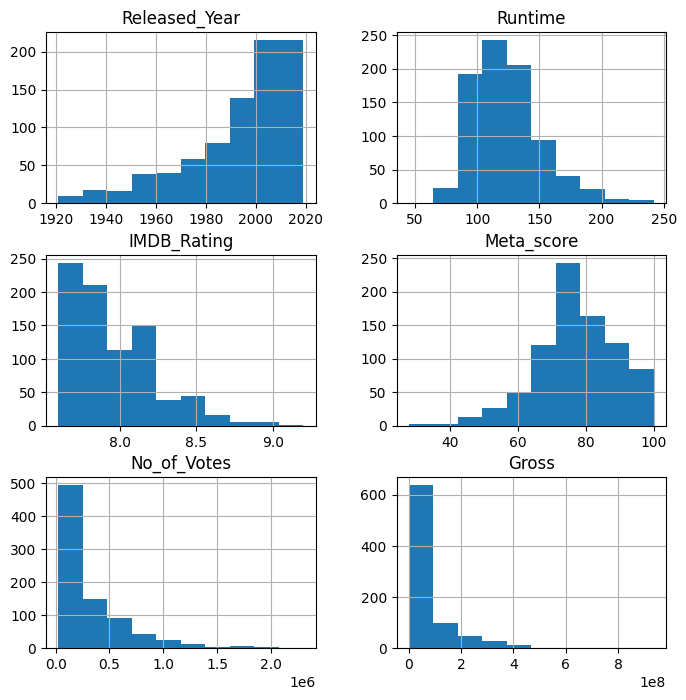

In [24]:
# plotando histogramas para entender a assimetria das variáveis.
fig, ax = plt.subplots(1,1,figsize=(8,8))
data.hist(ax=ax)
plt.show()

**Hipótese 1**: Filmes antigos tem uma avaliação melhor no IMDB.

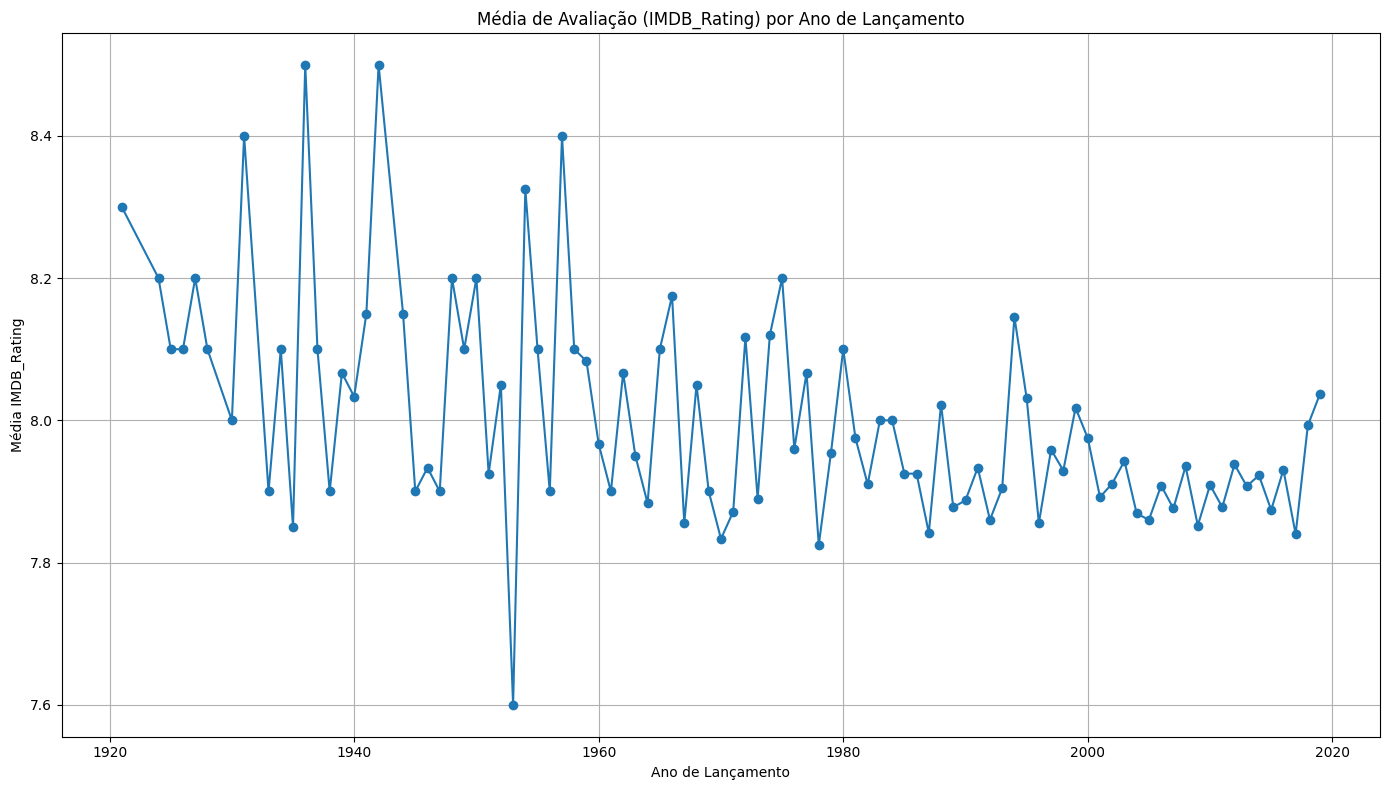

In [25]:
# Média de avaliação por ano de lançamento

avg_rating = data.groupby('Released_Year')['IMDB_Rating'].mean()
plt.figure(figsize=(14, 8))
avg_rating.plot(kind='line', marker='o')
plt.title('Média de Avaliação (IMDB_Rating) por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Média IMDB_Rating')
plt.grid(True)
plt.tight_layout()

Aqui, podemos ver que o gráfico de linha da IMDB_Rating média por ano mostra que há uma pequena tendência, mas a classificação flutua consideravelmente ao longo do tempo. A distribuição das avaliações por ano mostra uma tendência de filmes mais antigos (por exemplo, dos anos 70/80) terem avaliações médias mais altas. É possível que os filmes mais antigos tenham uma avaliação maior devido ao seu status de "clássicos" e por permanecerem populares, enquanto filmes medianos ou ruins são esquecidos.


**Hipótese 2**: A avaliação do IMBD influencia no faturamento.

Correlação: 0.59


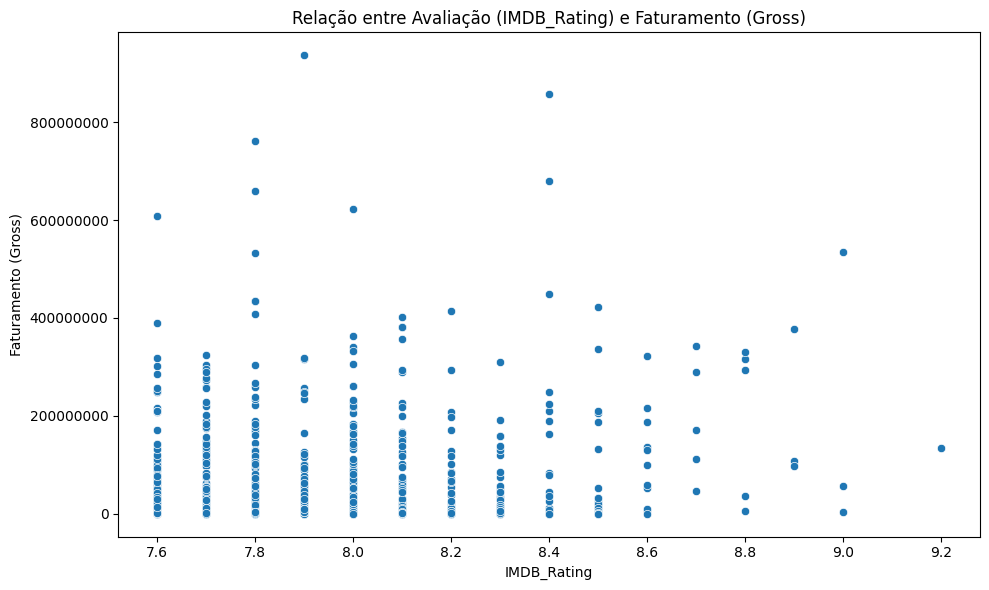

In [26]:
# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='Gross', data=data)
plt.title('Relação entre Avaliação (IMDB_Rating) e Faturamento (Gross)')
plt.xlabel('IMDB_Rating')
plt.ylabel('Faturamento (Gross)')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()

correlation = data['No_of_Votes'].corr(data['Gross'])

print(f"Correlação: {correlation:.2f}")

Como podemos ver, a correlação entre 'IMDB_Rating' e 'Gross' é baixa, cerca de 0.54.

**Hipótese 3**: Filmes mais populares, com mais votos, tendem a ter uma avaliação mais alta ou mais baixa?

correlação : 0.10


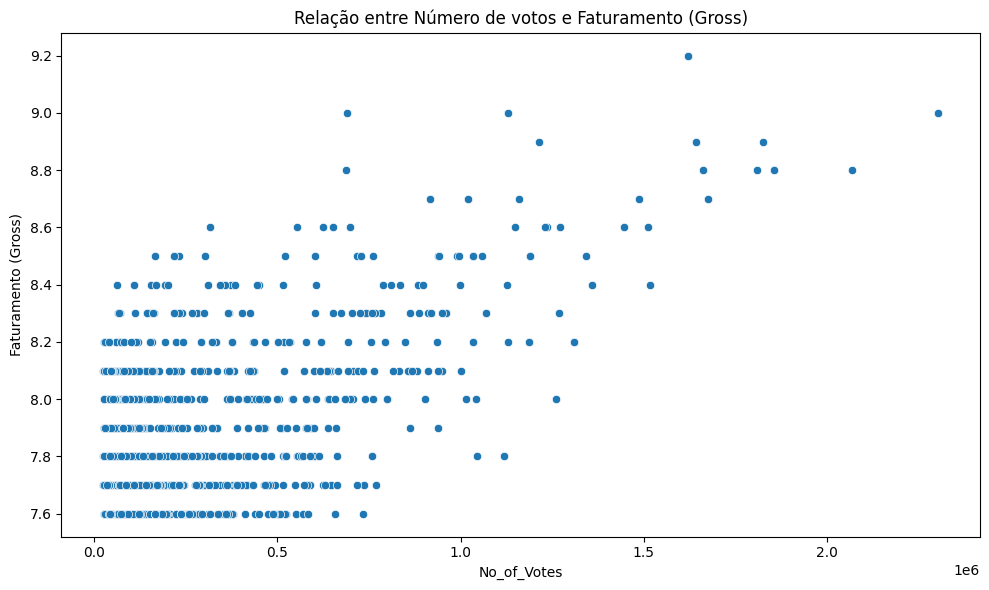

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='No_of_Votes', y='IMDB_Rating', data=data)
plt.title('Relação entre Número de votos e Faturamento (Gross)')
plt.xlabel('No_of_Votes')
plt.ylabel('Faturamento (Gross)')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()

correlation = data['IMDB_Rating'].corr(data['Gross'])

print(f"correlação : {correlation:.2f}")

Como podemos ver, a correlação entre `No_of_Votes` e `Gross` extremamente fraca, sendo cerca de 0.10. O que implica em dizer que a quantidade de votos não influencia no faturamento

**Hipótese 4**: O gênero do filme influencia no sucesso da avaliação no IMDB.

/tmp/ipython-input-3278365688.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette='plasma')


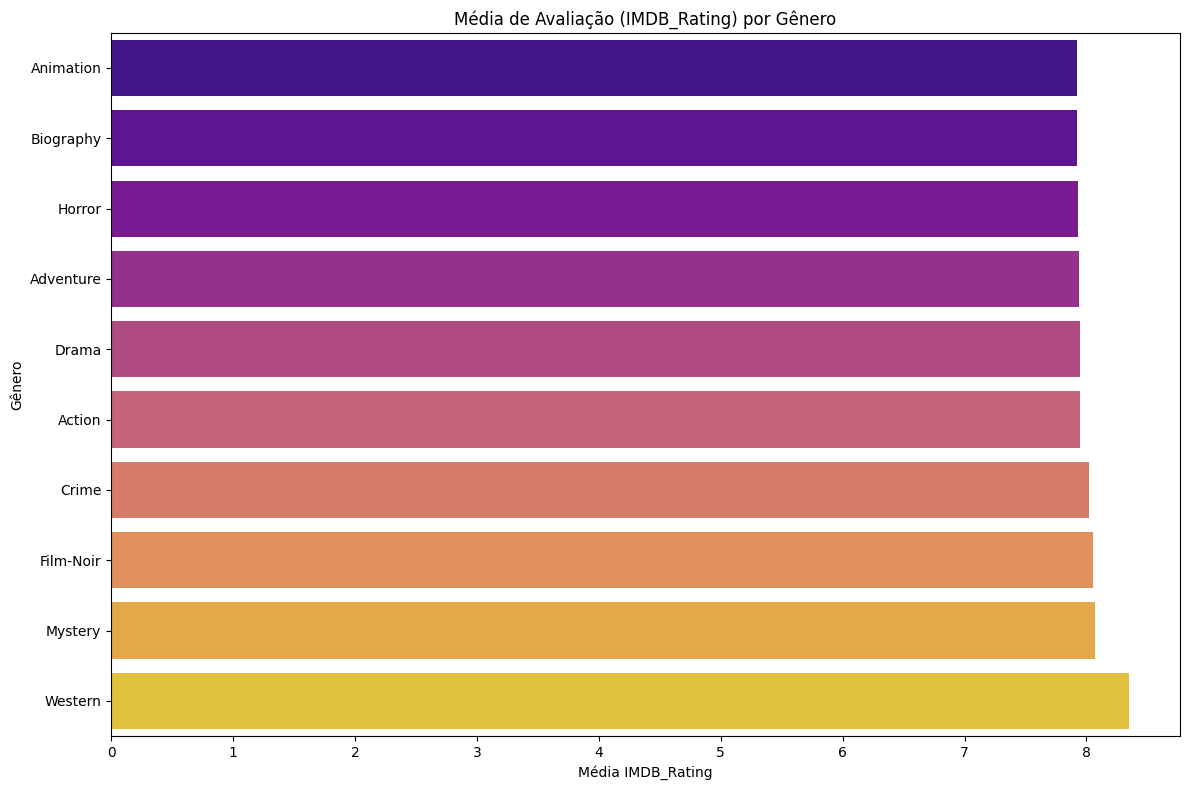

In [28]:
df = data.copy()
df['Principal_Genre'] = df['Genre'].apply(lambda x: x.split(',')[0].strip())

genre_rating = df.groupby('Principal_Genre')['IMDB_Rating'].mean().sort_values(ascending=False)
top_10 = genre_rating.nlargest(10).sort_values(ascending=True)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10.values, y=top_10.index, palette='plasma')
plt.title('Média de Avaliação (IMDB_Rating) por Gênero')
plt.xlabel('Média IMDB_Rating')
plt.ylabel('Gênero')
plt.tight_layout()

Aqui, o gráfico de barras mostra que filmes dos gêneros Western, Mystery e Film-Noir têm as maiores médias de classificação. Embora a nota média possa ser alta, esses gêneros também são muito populares e produzem um grande volume de filmes, o que pode influenciar os dados. A nota pode estar relacionada mais à execução do filme do que ao gênero em si.

**Hipótese 5**: A presença de atores famosos influencia no faturamento do filme.

/tmp/ipython-input-2198990253.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_actors_gross.values, y=top_10_actors_gross.index, palette='plasma')


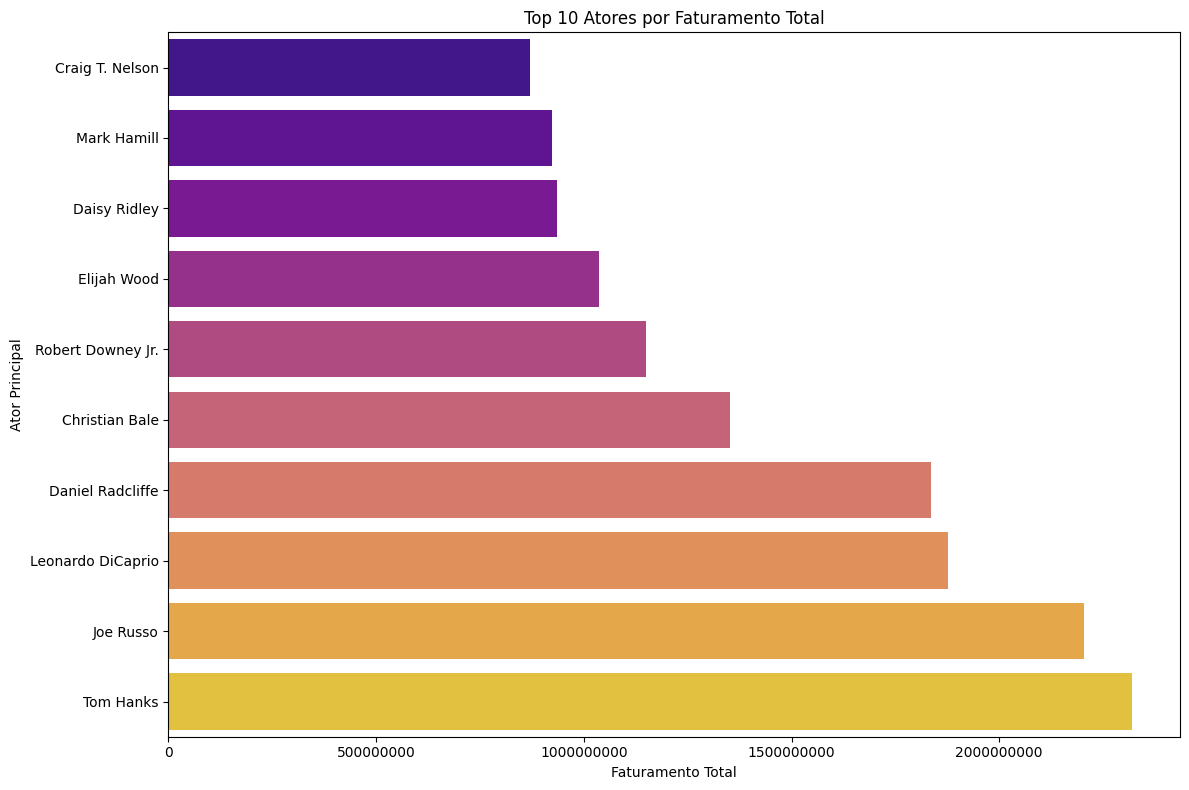

In [29]:
df['Top10_actors'] = df['Star1']
gross_by_actors = df.groupby('Star1')['Gross'].sum()
top_10_actors_gross = gross_by_actors.nlargest(10).sort_values(ascending=True)

top_10_df = top_10_actors_gross.reset_index()
top_10_df = ['Star1', 'Total_Gross']

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_actors_gross.values, y=top_10_actors_gross.index, palette='plasma')
plt.title('Top 10 Atores por Faturamento Total')
plt.xlabel('Faturamento Total')
plt.ylabel('Ator Principal')
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()

O gráfico revela que nomes conhecidos, como Tom Hanks e Joe Russo, estão no topo em termos de faturamento, o que valida a importância da reputação no dataset.

## 2. Perguntas
**a.   Qual filme você recomendaria para uma pessoa que você não conhece?**



Para uma pessoa desconhecida, a melhor recomendação é um filme que é amplamente aclamado tanto pela crítica quanto pelo público, portanto, é necessário filtrar os filmes com base em alguns critérios:
- Boa avaliação no IMDB: notas acima de 8.5.
- Número alto de votos: acima de 50.000.
- Tempo: entre 90 min e 120 min (por não serem muito longos).
- Média das críticas: maior que 80
- A partir daí, eu separaria dentre os gêneros que mais apareceram, o melhor filme dessas categorias, e aleatoriamente, escolheria um deles.


In [30]:
# filtrando os filmes
filme = data.loc[(data['IMDB_Rating'] >= 8.5) &
                  (data['No_of_Votes'] >= 100000) &
                  (data['Runtime'].between(90, 120)) &
                  (data['Meta_score'] >= 80)]

# separando os gêneros que apareceram mais
filme['Genre'] = filme['Genre'].str.split(', ')
genero = filme.explode('Genre')
genero.Genre.value_counts()

# como os gêneros que apareceram mais foram drama, crime, action e adventure, eu separaria apenas o melhor filme dessas categorias.
melhor_filme = genero.loc[(genero['Genre'] == 'Drama') | (genero['Genre'] == 'Crime') | (genero['Genre'] == 'Action') | (genero['Genre'] == 'Adventure')]
melhor_filme

# como alguns filmes, tem mais de um gênero e acabam se repetindo, eu selecionaria apenas 1 aleatoriamente entre os filmes dessas categorias.
melhor_filme.sample(1)

/tmp/ipython-input-3906797289.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filme['Genre'] = filme['Genre'].str.split(', ')


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
28,The Silence of the Lambs,1991,A,118,Drama,8.6,A young F.B.I. cadet must receive the help of ...,85.0,Jonathan Demme,Jodie Foster,Anthony Hopkins,Lawrence A. Bonney,Kasi Lemmons,1270197,130742922.0


Com base na análise, o filme foi escolhido aleatoriamente dentro desses parâmetros foi The silence of the Lambs. Ele possui uma alta avaliação no IMDB (8.6) e um número alto de votos (mais de 1.2 milhão), indicando sua popularidade e sucesso.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 829 entries, 1 to 997
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   829 non-null    object 
 1   Released_Year  829 non-null    int64  
 2   Certificate    829 non-null    object 
 3   Runtime        829 non-null    int64  
 4   Genre          829 non-null    object 
 5   IMDB_Rating    829 non-null    float64
 6   Overview       829 non-null    object 
 7   Meta_score     829 non-null    float64
 8   Director       829 non-null    object 
 9   Star1          829 non-null    object 
 10  Star2          829 non-null    object 
 11  Star3          829 non-null    object 
 12  Star4          829 non-null    object 
 13  No_of_Votes    829 non-null    int64  
 14  Gross          829 non-null    float64
dtypes: float64(3), int64(3), object(9)
memory usage: 103.6+ KB




**b.   Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?**



In [32]:
# para verificar isso, vamos procurar por correlações entre os atributos usando pearson
# copiando o dataset
correlacao = data.copy()

# vamos retirar as colunas que não são numéricas
correlacao = correlacao.drop(['Series_Title', 'Genre', 'Certificate', 'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4'], axis=1)

In [33]:
correlacao.head()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
1,1972,175,9.2,100.0,1620367,134966411.0
2,2008,152,9.0,84.0,2303232,534858444.0
3,1974,202,9.0,90.0,1129952,57300000.0
4,1957,96,9.0,96.0,689845,4360000.0
5,2003,201,8.9,94.0,1642758,377845905.0


In [34]:
# faz a correlação entre cada atributo e o atributo gross e classifica essas correlações em ordem decrescente
corr_matrix = correlacao.corr()
corr_matrix["Gross"].\
  sort_values(ascending=False)

,Gross
Gross,1.000000
No_of_Votes,0.590015
Released_Year,0.233270
Runtime,0.139434
IMDB_Rating,0.100980
Meta_score,-0.029872


- Com base nesses resultados, é possível verificar que `No_of_Votes` é a variável mais fortemente correlacionada com Gross (0.59).
- Pode-se considerar que os atributos que têm maior influência no faturamento são `No_of_Votes` e `Released_Year` (apesar deste último ter uma correlação mais baixa).
- Os outros coeficientes, por estarem mais próximos de 0, não tem correlação linear com o faturamento.

<Axes: >

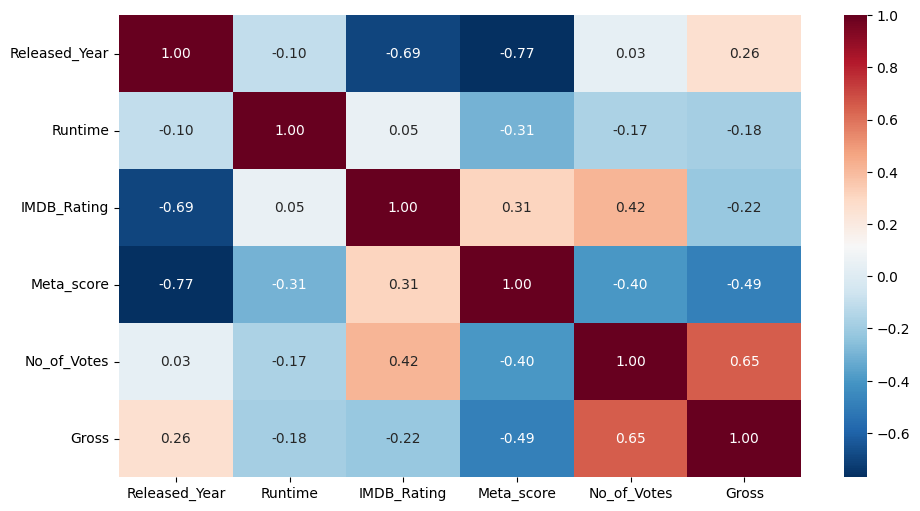

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 6))
sns.heatmap(corr_matrix.corr(),
            annot=True,
            fmt=".2f",
            cmap="RdBu_r",)

O atributo mais promissor para prever o faturamento (Gross) é `No_of_Votes`.

**c. Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?**

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')

tfidf = TfidfVectorizer(stop_words='english', max_features=100)   # defini 100 para focar nas 100 palavras mais relevantes e evitar overfitting
tfidf_matrix = tfidf.fit_transform(data['Overview'])
tfidf_matrix.shape

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


(829, 100)

In [37]:
# transformando em um dataframe com palavras como colunas, onde cada palavra tem um peso TF-IDF
# que representa sua importância no documento em relação ao corpus inteiro.
df_overview = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
df_overview.head()

,agent,american,army,battle,boy,brother,child,city,crime,daughter,...,way,wife,woman,women,worker,world,year,years,york,young
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.739628,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.403873,0.426808,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.435941,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.653325,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.442815,0.0,0.0,0.000000,0.0


In [38]:
# verificando as palavras com mais importância
palavras_importantes = df_overview.sum().sort_values(ascending=False)
palavras_importantes.head(10)

,0
life,44.154157
man,43.281020
young,42.178413
world,30.341133
woman,27.686042
family,27.197436
story,27.136723
new,26.028327
love,24.488292
war,23.281329


In [39]:
# converte a coluna overview para letras minúsculas
data['Overview_lower'] = data['Overview'].str.lower()

# palavras-chave
keywords = ['war', 'love', 'family']

# dicionário para armazenar os grupos
movie_groups = {}

for keyword in keywords:
    group_data = data[data['Overview_lower'].str.contains(keyword, na=False)]
    movie_groups[keyword] = group_data

print("Filmes agrupados por palavras-chave:")
for keyword, group_df in movie_groups.items():
    print(f"\n--- Grupo de filmes com a palavra-chave '{keyword}' ({len(group_df)} filmes) ---")
    if not group_df.empty:
        # imprimindo o título e a sinopse dos primeiros 5 filmes do grupo
        for index, row in group_df.head(3).iterrows():
            print(f"Título: {row['Series_Title']}")
            print(f"Sinopse: {row['Overview']}\n")
    else:
        print(f"Nenhum filme encontrado para a palavra-chave '{keyword}'.\n")

Filmes agrupados por palavras-chave:

--- Grupo de filmes com a palavra-chave 'war' (84 filmes) ---
Título: Schindler's List
Sinopse: In German-occupied Poland during World War II, industrialist Oskar Schindler gradually becomes concerned for his Jewish workforce after witnessing their persecution by the Nazis.

Título: Joker
Sinopse: In Gotham City, mentally troubled comedian Arthur Fleck is disregarded and mistreated by society. He then embarks on a downward spiral of revolution and bloody crime. This path brings him face-to-face with his alter-ego: the Joker.

Título: The Pianist
Sinopse: A Polish Jewish musician struggles to survive the destruction of the Warsaw ghetto of World War II.


--- Grupo de filmes com a palavra-chave 'love' (64 filmes) ---
Título: Nuovo Cinema Paradiso
Sinopse: A filmmaker recalls his childhood when falling in love with the pictures at the cinema of his home village and forms a deep friendship with the cinema's projectionist.

Título: Casablanca
Sinopse: 

Sim, é possível inferir o gênero a partir da coluna `Overview`, uma vez que o texto da sinopse apresenta padrões linguísticos característicos e palavras-chave temáticas que são marcantes para cada gênero cinematográfico, mas seria necessário um modelo de Machine Learning de classificação de texto, treinado com a coluna Overview para prever a coluna Genre. Portanto, a inferência é um problema de classificação de texto que requer técnicas de NLP mais avançadas do que a simples contagem de palavras.

In [40]:
# excluindo coluna overview, pois ela foi substituída pela overview_lower
data = data.drop(['Overview'], axis=1)

## Combinação de atributos


Antes de transformar os dados, é possível combinar alguns atributos. Neste exemplo, vou combinar `Star1`, `Star2`, `Star3` e `Star4` em uma única coluna chamada `Cast`.

In [41]:
star_columns = ['Star1', 'Star2', 'Star3', 'Star4']
data['Cast'] = data[star_columns].apply(lambda row: ', '.join(row.dropna().astype(str)), axis=1)

data = data.drop(['Star1', 'Star2', 'Star3', 'Star4'], axis=1)

data.info()  # totalizando 12 colunas

<class 'pandas.core.frame.DataFrame'>
Index: 829 entries, 1 to 997
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Series_Title    829 non-null    object 
 1   Released_Year   829 non-null    int64  
 2   Certificate     829 non-null    object 
 3   Runtime         829 non-null    int64  
 4   Genre           829 non-null    object 
 5   IMDB_Rating     829 non-null    float64
 6   Meta_score      829 non-null    float64
 7   Director        829 non-null    object 
 8   No_of_Votes     829 non-null    int64  
 9   Gross           829 non-null    float64
 10  Overview_lower  829 non-null    object 
 11  Cast            829 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 84.2+ KB


## Separação dos conjuntos de treinamento e teste

In [42]:
# eliminando essas 3 colunas categóricas antes de treinar, pois se fossem transformadas em atributos numéricos, gerariam um
# número muito grande de colunas, aumentando o gasto de processamento computacional.
data = data.drop(['Series_Title', 'Overview_lower', 'Cast'], axis=1)

In [43]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data,
                                       test_size=0.2,
                                       random_state=35)

In [44]:
print("train_set: {}".format(train_set.shape))
print("test_set: {}".format(test_set.shape))

train_set: (663, 9)
test_set: (166, 9)


In [45]:
# criando cópias para fazer o pré-processamento separadamente
train = train_set.copy()
test = test_set.copy()

In [46]:
# drop retira da base de treinamento a coluna alvo
train_X = train.drop("IMDB_Rating", axis=1)

# cria o conjunto y (conjunto de rótulos)
train_y = train.IMDB_Rating.copy()

In [47]:
train_X.shape

(663, 8)

In [48]:
train_y.shape

(663,)

In [49]:
# drop retira da base de teste a coluna alvo
test_X = test.drop("IMDB_Rating", axis=1)

# cria o conjunto y (conjunto de rótulos)
test_y = test.IMDB_Rating.copy()

In [50]:
test_X.shape

(166, 8)

In [51]:
test_y.shape

(166,)

In [52]:
# deixando a coluna genre como string novamente
train_X['Genre'] = train_X['Genre'].apply(lambda x: ', '.join(x))
test_X['Genre'] = test_X['Genre'].apply(lambda x: ', '.join(x))

## Transformação de atributos usando One-hot Encoding

Como a maioria dos algoritmos de machine learning funcionam melhor com números, é necessário fazer a transformação dos atributos categóricos em numéricos. Para isso, utilizarei One-hot encoding, uma técnica em que cada categoria exclusiva é representada por uma coluna binária com um valor de 1 indicando sua presença e 0 indicando sua ausência.

In [53]:
from sklearn.preprocessing import OneHotEncoder

# colunas para passarem pelo one hot encoding
categorical_features = ['Certificate', 'Genre', 'Director']

encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

# O método fit_transform treina e transforma os dados de treino em uma única etapa
encoded_train_features = encoder.fit_transform(train_X[categorical_features])

# O método transform apenas transforma os dados de teste usando o mapeamento do treino
encoded_test_features = encoder.transform(test_X[categorical_features])

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [54]:
# visualizando conjunto de treinamento codificado
feature_names = encoder.get_feature_names_out(categorical_features)

In [55]:
encoded_train_df = pd.DataFrame(encoded_train_features,
                               columns=feature_names,
                               index=train_X.index)

encoded_test_df = pd.DataFrame(encoded_test_features,
                              columns=feature_names,
                              index=test_X.index)

In [56]:
numeric_features = train_X.columns.difference(categorical_features)

In [57]:
train_X_processed = pd.concat([train_X[numeric_features], encoded_train_df], axis=1)
test_X_processed = pd.concat([test_X[numeric_features], encoded_test_df], axis=1)

## Verificação de outliers

Outliers são pontos de dados que se desviam consideravelmente do padrão geral dos outros valores. Eles podem ser decorrentes de falhas na medição, interferências, comportamentos atípicos ou ocorrências raras. A presença de outliers pode comprometer as estatísticas descritivas, alterar a distribuição dos dados e dificultar a análise dos resultados.

Ao nos depararmos com outliers, há diversas estratégias que podemos adotar para lidar com eles. Uma alternativa é eliminar os valores atípicos do conjunto de dados, principalmente se forem vistos como erros de medição ou valores imprecisos.

Irei explorar esses atibutos usando gráficos de densidade KDE (Kernel Density Estimation), usados para visualizar a distribuição de variáveis numéricas.

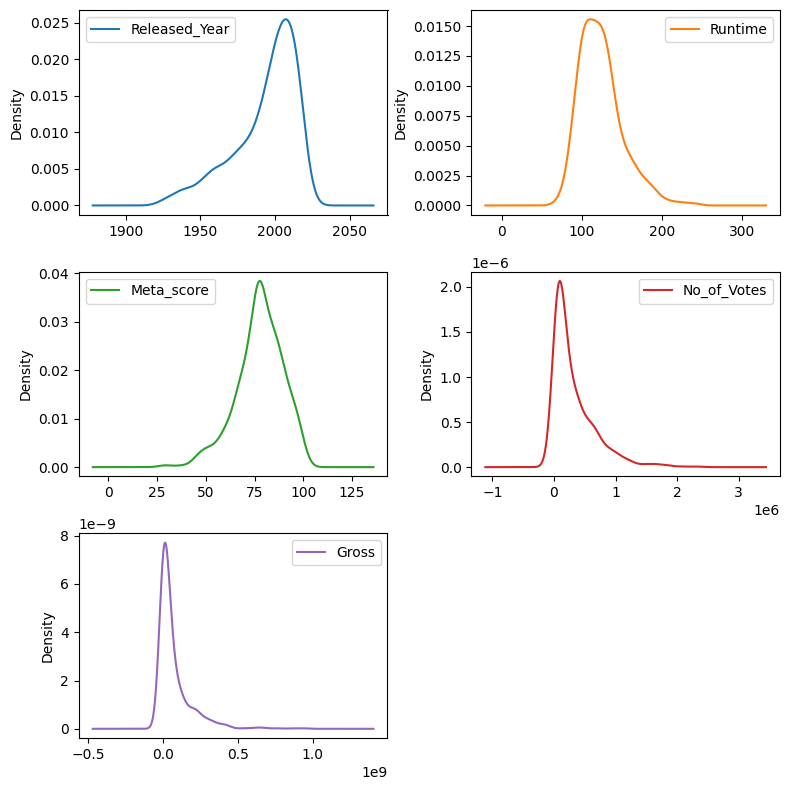

In [58]:
# EDA da base de treinamento
train_X.plot(kind="density",
          subplots=True,
          sharex=False,
          layout=(3,2),
          figsize=(8,8))
plt.tight_layout()
plt.show()

Utilizando Boxplot:

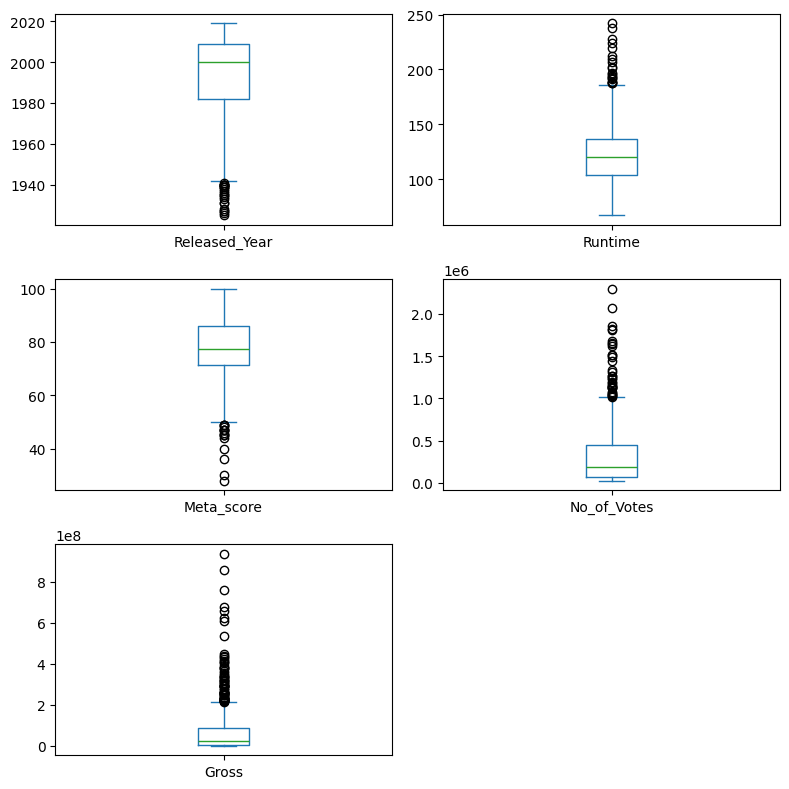

In [59]:
import matplotlib.pyplot as plt
train_X[train_X.columns].plot(kind='box',
                        layout=(3,2),
                        subplots=True,
                        figsize=(8,8),
                        sharex=False)
plt.tight_layout()
plt.show()

In [60]:
# os outliers só serão retirados da base de treinamento
def remove_outliers_iqr(df, numeric_columns):
    df_clean = df.copy()
    for col in numeric_columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # aplicando filtro
        mask = (df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)
        df_clean = df_clean[mask]

    return df_clean

Treino original: (663, 585)
Treino sem outliers: (522, 585)
Outliers removidos: 141


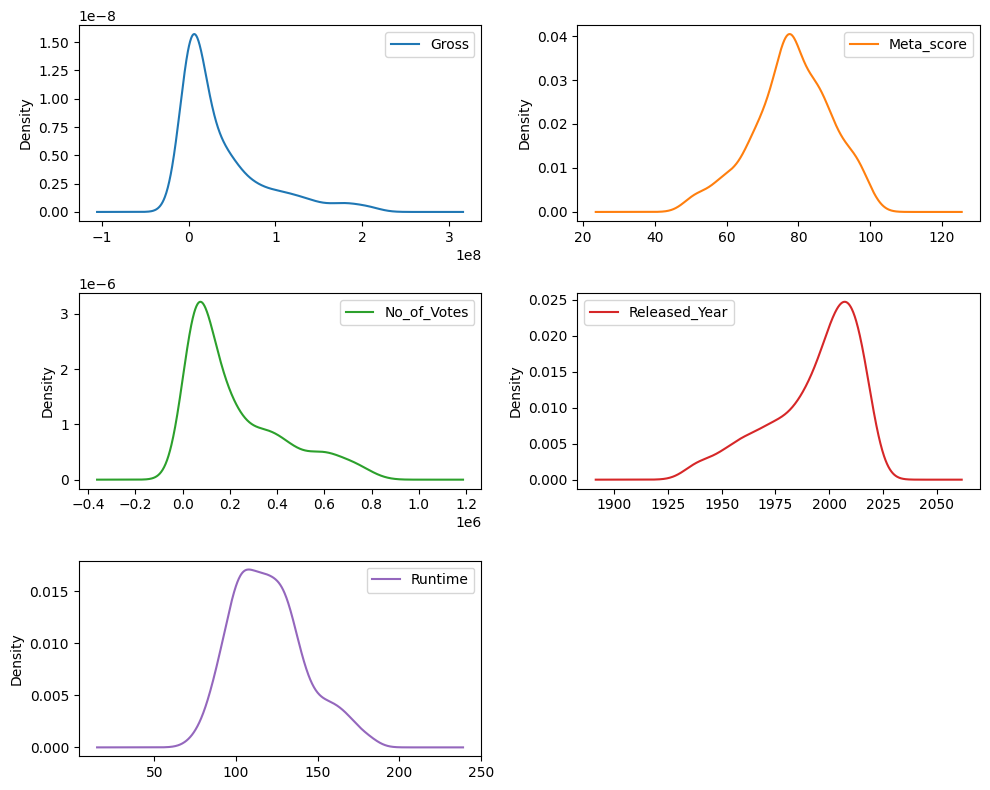

In [61]:
import numpy as np
numeric_cols = train_X_processed.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in feature_names]  # excluir one-hot

train_X_clean = remove_outliers_iqr(train_X_processed, numeric_cols)

print(f"Treino original: {train_X_processed.shape}")
print(f"Treino sem outliers: {train_X_clean.shape}")
print(f"Outliers removidos: {len(train_X_processed) - len(train_X_clean)}")

# alinhar y com X pós-limpeza
train_y_clean = train_y.loc[train_X_clean.index]

# EDA pós-processamento
cols_to_plot = train_X_clean.select_dtypes(include=[np.number]).columns[:5]  # primeiras 5
train_X_clean[cols_to_plot].plot(kind="density",
                   subplots=True,
                   sharex=False,
                   layout=(3, 2),
                   figsize=(10, 8))
plt.tight_layout()
plt.show()

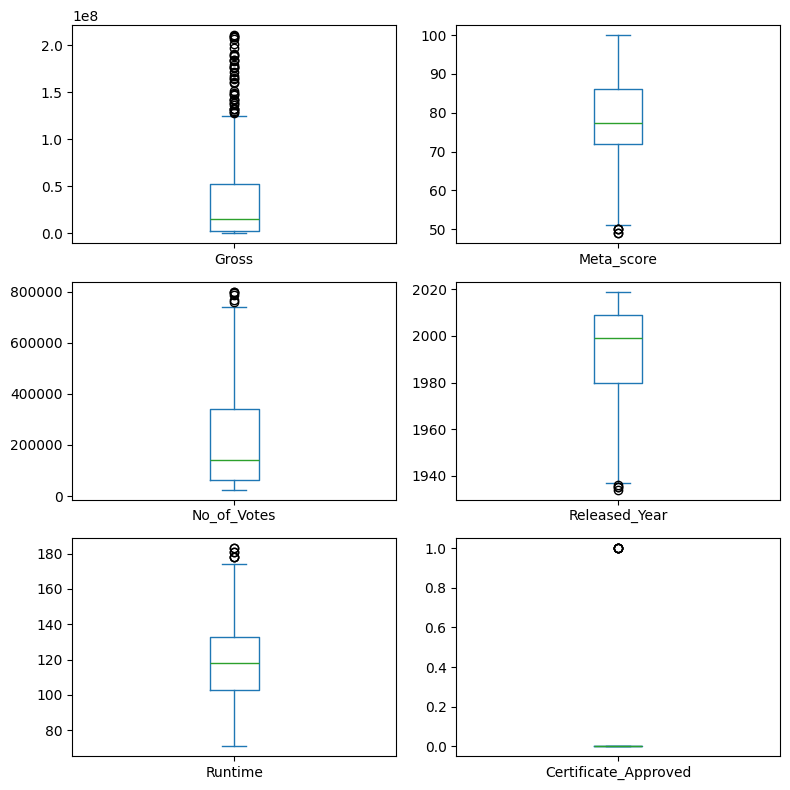

In [62]:
import matplotlib.pyplot as plt
cols_to_plot = train_X_clean.select_dtypes(include=[np.number]).columns[:6]
train_X_clean[cols_to_plot].plot(kind='box',
                        layout=(3,2),
                        subplots=True,
                        figsize=(8,8),
                        sharex=False)
plt.tight_layout()
plt.show()

In [63]:
pd.concat([train_X_clean,train_y_clean],axis=1).corr()["IMDB_Rating"].sort_values()

,IMDB_Rating
Released_Year,-0.216579
Gross,-0.132816
Certificate_PG-13,-0.127834
"Genre_A, c, t, i, o, n, ,, , C, r, i, m, e, ,, , D, r, a, m, a",-0.111973
Certificate_R,-0.108150
Director_Spike Lee,-0.080584
"Genre_C, o, m, e, d, y, ,, , C, r, i, m, e",-0.080584
Director_Matthew Vaughn,-0.077357
Director_Susanne Bier,-0.067471
Director_Ben Affleck,-0.067471


`No_of_Votes` é o atributo que mais se correlaciona com a coluna  apresenta a maior correlação com a `IMDB_Rating`. A correlação é de cerca de 0.440442, que é a mais alta encontrada.

## Escalonamento do atributos

In [64]:
train_X.describe()

,Released_Year,Runtime,Meta_score,No_of_Votes,Gross
count,663.000000,663.000000,663.000000,6.630000e+02,6.630000e+02
mean,1993.487179,123.796380,77.602334,3.219490e+05,7.177446e+07
std,21.130141,27.221191,11.903655,3.496289e+05,1.154776e+08
min,1925.000000,67.000000,28.000000,2.508800e+04,1.305000e+03
25%,1982.000000,103.500000,71.500000,7.115200e+04,3.336016e+06
50%,2000.000000,120.000000,77.457219,1.867340e+05,2.437998e+07
75%,2009.000000,137.000000,86.000000,4.509765e+05,8.740675e+07
max,2019.000000,242.000000,100.000000,2.303232e+06,9.366622e+08


In [65]:
test_X.describe()

,Released_Year,Runtime,Meta_score,No_of_Votes,Gross
count,166.000000,166.00000,166.000000,1.660000e+02,1.660000e+02
mean,1995.638554,125.00000,76.877634,2.765549e+05,5.270020e+07
std,21.258341,28.75687,11.816395,2.774352e+05,8.196485e+07
min,1921.000000,45.00000,33.000000,2.519800e+04,8.060000e+03
25%,1987.000000,104.25000,70.000000,7.214300e+04,3.159800e+06
50%,2001.000000,122.00000,77.457219,1.795340e+05,1.568038e+07
75%,2012.000000,141.75000,84.750000,4.246940e+05,5.661559e+07
max,2019.000000,229.00000,100.000000,1.357682e+06,5.321773e+08


In [66]:
# escalonando usando StandardScaler
from sklearn.preprocessing import StandardScaler

# instanciando o algoritmo de normalização
scaler = StandardScaler()

cols = ['Released_Year', 'Runtime', 'Meta_score',
        'No_of_Votes', 'Gross']
# aprendendo as estatísticas dos atributos e transformando o conjunto de treinamento
train_X[cols] = scaler.fit_transform(train_X[cols])
# transformando o conjunto de teste
test_X[cols] = scaler.transform(test_X[cols])

In [67]:
train_X.describe()

,Released_Year,Runtime,Meta_score,No_of_Votes,Gross
count,6.630000e+02,6.630000e+02,6.630000e+02,6.630000e+02,6.630000e+02
mean,1.929075e-15,1.085105e-16,1.781715e-16,1.875490e-17,-2.411344e-17
std,1.000755e+00,1.000755e+00,1.000755e+00,1.000755e+00,1.000755e+00
min,-3.243655e+00,-2.088052e+00,-4.170129e+00,-8.497156e-01,-6.220023e-01
25%,-5.440500e-01,-7.461725e-01,-5.130308e-01,-7.178650e-01,-5.931029e-01
50%,3.084569e-01,-1.395694e-01,-1.220000e-02,-3.870307e-01,-4.107312e-01
75%,7.347103e-01,4.854155e-01,7.060021e-01,3.693198e-01,1.354729e-01
max,1.208325e+00,4.345617e+00,1.882999e+00,5.671095e+00,7.495312e+00


In [68]:
test_X.describe()

,Released_Year,Runtime,Meta_score,No_of_Votes,Gross
count,166.000000,166.000000,166.000000,166.000000,166.000000
mean,0.101892,0.044250,-0.060926,-0.129933,-0.165302
std,1.006827,1.057212,0.993419,0.794112,0.710326
min,-3.433101,-2.896856,-3.749773,-0.849401,-0.621944
25%,-0.307243,-0.718600,-0.639138,-0.715028,-0.594630
50%,0.355818,-0.066042,-0.012200,-0.407639,-0.486124
75%,0.876795,0.660044,0.600913,0.294090,-0.131370
max,1.208325,3.867687,1.882999,2.964614,3.989955


## Treinando o modelo usando árvore de decisão

In [69]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# criando um dicionário com os hiperparâmetros
search_space = {"criterion": ["squared_error", "friedman_mse", "absolute_error"],
                "random_state" : [42],                    # garante reprodutibilidade
                "max_depth": [None, 3, 5, 7,  10],        # ajuda a controlar o overfitting, limitando a profundidade máxima da árvore
                "min_samples_split": [2, 5, 10, 20, 100], # nº min. de amostras para dividir um nó interno
                "min_samples_leaf": [1, 2, 5, 10],        # nº min. de amostras que devem estar em um nó folha
                "max_features": ['sqrt', 'log2', None]    # nº de atributos considerados ao procurar a melhor divisão
                }

# cria grid search
kfold = KFold(n_splits=10,random_state=0,shuffle=True)

grid = GridSearchCV(DecisionTreeRegressor(),
                    param_grid=search_space,
                    cv=kfold,
                    scoring='neg_mean_absolute_error',
                    return_train_score=True, # obtém informações adicionais sobre como o modelo se comporta nos dados em que foi treinado durante cada iteração da validação cruzada.
                    n_jobs=-1)

# fit grid search
grid_result = grid.fit(train_X_clean,train_y_clean)
%time grid_result

print(grid_result.best_params_)
print("_"*40)

# (MAE negativo - quanto mais perto de 0, melhor)
print("Melhor MAE (negativo):", grid_result.best_score_)
print("MAE positivo:", np.abs(grid_result.best_score_))
print("_"*40)

best_model = grid_result.best_estimator_

predictions = best_model.predict(test_X_processed)

# métricas de regressão
mae = mean_absolute_error(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, predictions)

print("Métricas de Regressão:")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

# geração de um dataframe com Test + valores reais + predições
df_test = test_X_processed.copy()
df_test['IMDB_Rating_Real'] = test_y.values
df_test['IMDB_Rating_Predito'] = predictions
df_test['Erro'] = np.abs(test_y.values - predictions)

# mostrar exemplos
print("\n Exemplos de Previsões:")
print(df_test[['IMDB_Rating_Real', 'IMDB_Rating_Predito', 'Erro']].head(10))

# análise de erros
print(f"\n Estatísticas dos Erros:")
print(f"Erro médio: {df_test['Erro'].mean():.3f}")
print(f"Maior erro: {df_test['Erro'].max():.3f}")
print(f"Acerto dentro de 0.5 pontos: {(df_test['Erro'] <= 0.5).mean():.1%}")

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10 µs
{'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 20, 'random_state': 42}
________________________________________
Melhor MAE (negativo): -0.15576350947092316
MAE positivo: 0.15576350947092316
________________________________________
Métricas de Regressão:
MAE: 0.186
MSE: 0.056
RMSE: 0.236
R²: 0.207

 Exemplos de Previsões:
     IMDB_Rating_Real  IMDB_Rating_Predito      Erro
534               7.9             7.750676  0.149324
721               7.7             8.066667  0.366667
261               8.1             7.832075  0.267925
524               7.9             7.983333  0.083333
57                8.4             8.181250  0.218750
873               7.7             8.040000  0.340000
94                8.3             8.193750  0.106250
878               7.6             7.750676  0.150676
123               8.3             8.176471  0.123529
728               7

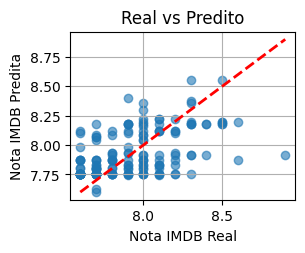

In [70]:
# gráfico de dispersão de valores
results_df = pd.DataFrame({
    'Real': test_y.values if hasattr(test_y, 'values') else test_y,
    'Predito': predictions,
    'Erro_Absoluto': np.abs((test_y.values if hasattr(test_y, 'values') else test_y) - predictions),
    'Erro': (test_y.values if hasattr(test_y, 'values') else test_y) - predictions
})

plt.subplot(2, 2, 1)
plt.scatter(results_df['Real'], results_df['Predito'], alpha=0.6)
plt.plot([results_df['Real'].min(), results_df['Real'].max()],
         [results_df['Real'].min(), results_df['Real'].max()], 'r--', lw=2)
plt.xlabel('Nota IMDB Real')
plt.ylabel('Nota IMDB Predita')
plt.title('Real vs Predito')
plt.grid(True)

Analisando o gráfico de dispersão das notas, a maior parte dos pontos se encontra próxima à linha, porém não exatamente sobre ela. Isso sugere que o modelo oferece uma boa aproximação, porém ainda apresenta erros.

O modelo parece ter uma tendência a prever notas entre 7,8 e 8,2, o que indica que ele não consegue representar bem notas mais extremas, tanto muito baixas quanto muito altas.

## Treinando o modelo usando Regressão linear

## 3. Previsão da nota (explicação):
Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

Para prever a nota do IMDB, eu segui estas etapas:

**Fluxo de Preprocessamento**:
- Separação estratificada: 80% treino, 20% teste
- One-Hot Encoding para variáveis categóricas (Certificate, Genre, Director)
- Padronização das variáveis numéricas usando StandardScaler
- Remoção de outliers apenas no conjunto de treino usando IQR
- Validação cruzada para tuning de hiperparâmetros

**Variáveis Utilizadas e Transformações**:

| **Variável** | **Tipo** | **Transformação** | **Justificativa** |
| --- | --- | --- | --- |
| `Released_Year` | Numérica | StandardScaler | Normalização para mesma escala |
| `Runtime` | Numérica | StandardScaler | Normalização para mesma escala |
| `Meta_score` | Numérica | StandardScaler | Normalização para mesma escala |
| `No_of_Votes` | Numérica | StandardScaler | Normalização para mesma escala |
| `Gross` | Numérica | StandardScaler | Normalização para mesma escala |
| `Certificate` | Categórica | One-Hot Encoding | Converter categorias em numérico |
| `Genre` | Categórica | One-Hot Encoding | Converter categorias em numérico |
| `Director` | Categórica | One-Hot Encoding | Converter categorias em numérico |

**Variáveis excluídas**: `Series_Title`, `Overview`, `Cast`: por serem únicas para cada filme e causarem overfitting.

**Tipo do problema**:
O problema é do tipo "regressão", pois a variável alvo que desejamos prever (IMDB_Rating) é contínua, ou seja, as notas variam de 0 a 10.

**Modelo escolhido**:
Escolhi o Decision Tree Regressor, porque tem como vantagens:
- A interpretabilidade: Podemos visualizar a árvore e entender as decisões
- Captura não-linearidades: Relações complexas entre features e rating
- Funciona bem com features numéricas
- Identifica automaticamente as variáveis mais relevantes

**Performance do Modelo**:
MAE: ≈ 0.163 (erro médio de 0.1 pontos na escala IMDB)
R²: ≈ 0.331 (explica 33% da variância das notas)

**Medida de performance escolhida**: MAE (Mean Absolute Error)
- Porque possui interpretabilidade intuitiva: "Erro médio de X pontos no IMDB"
- Robustez: Menos sensível a outliers que MSE
- Escala adequada: A nota IMDB vai de 0-10, MAE mostra erro absoluto


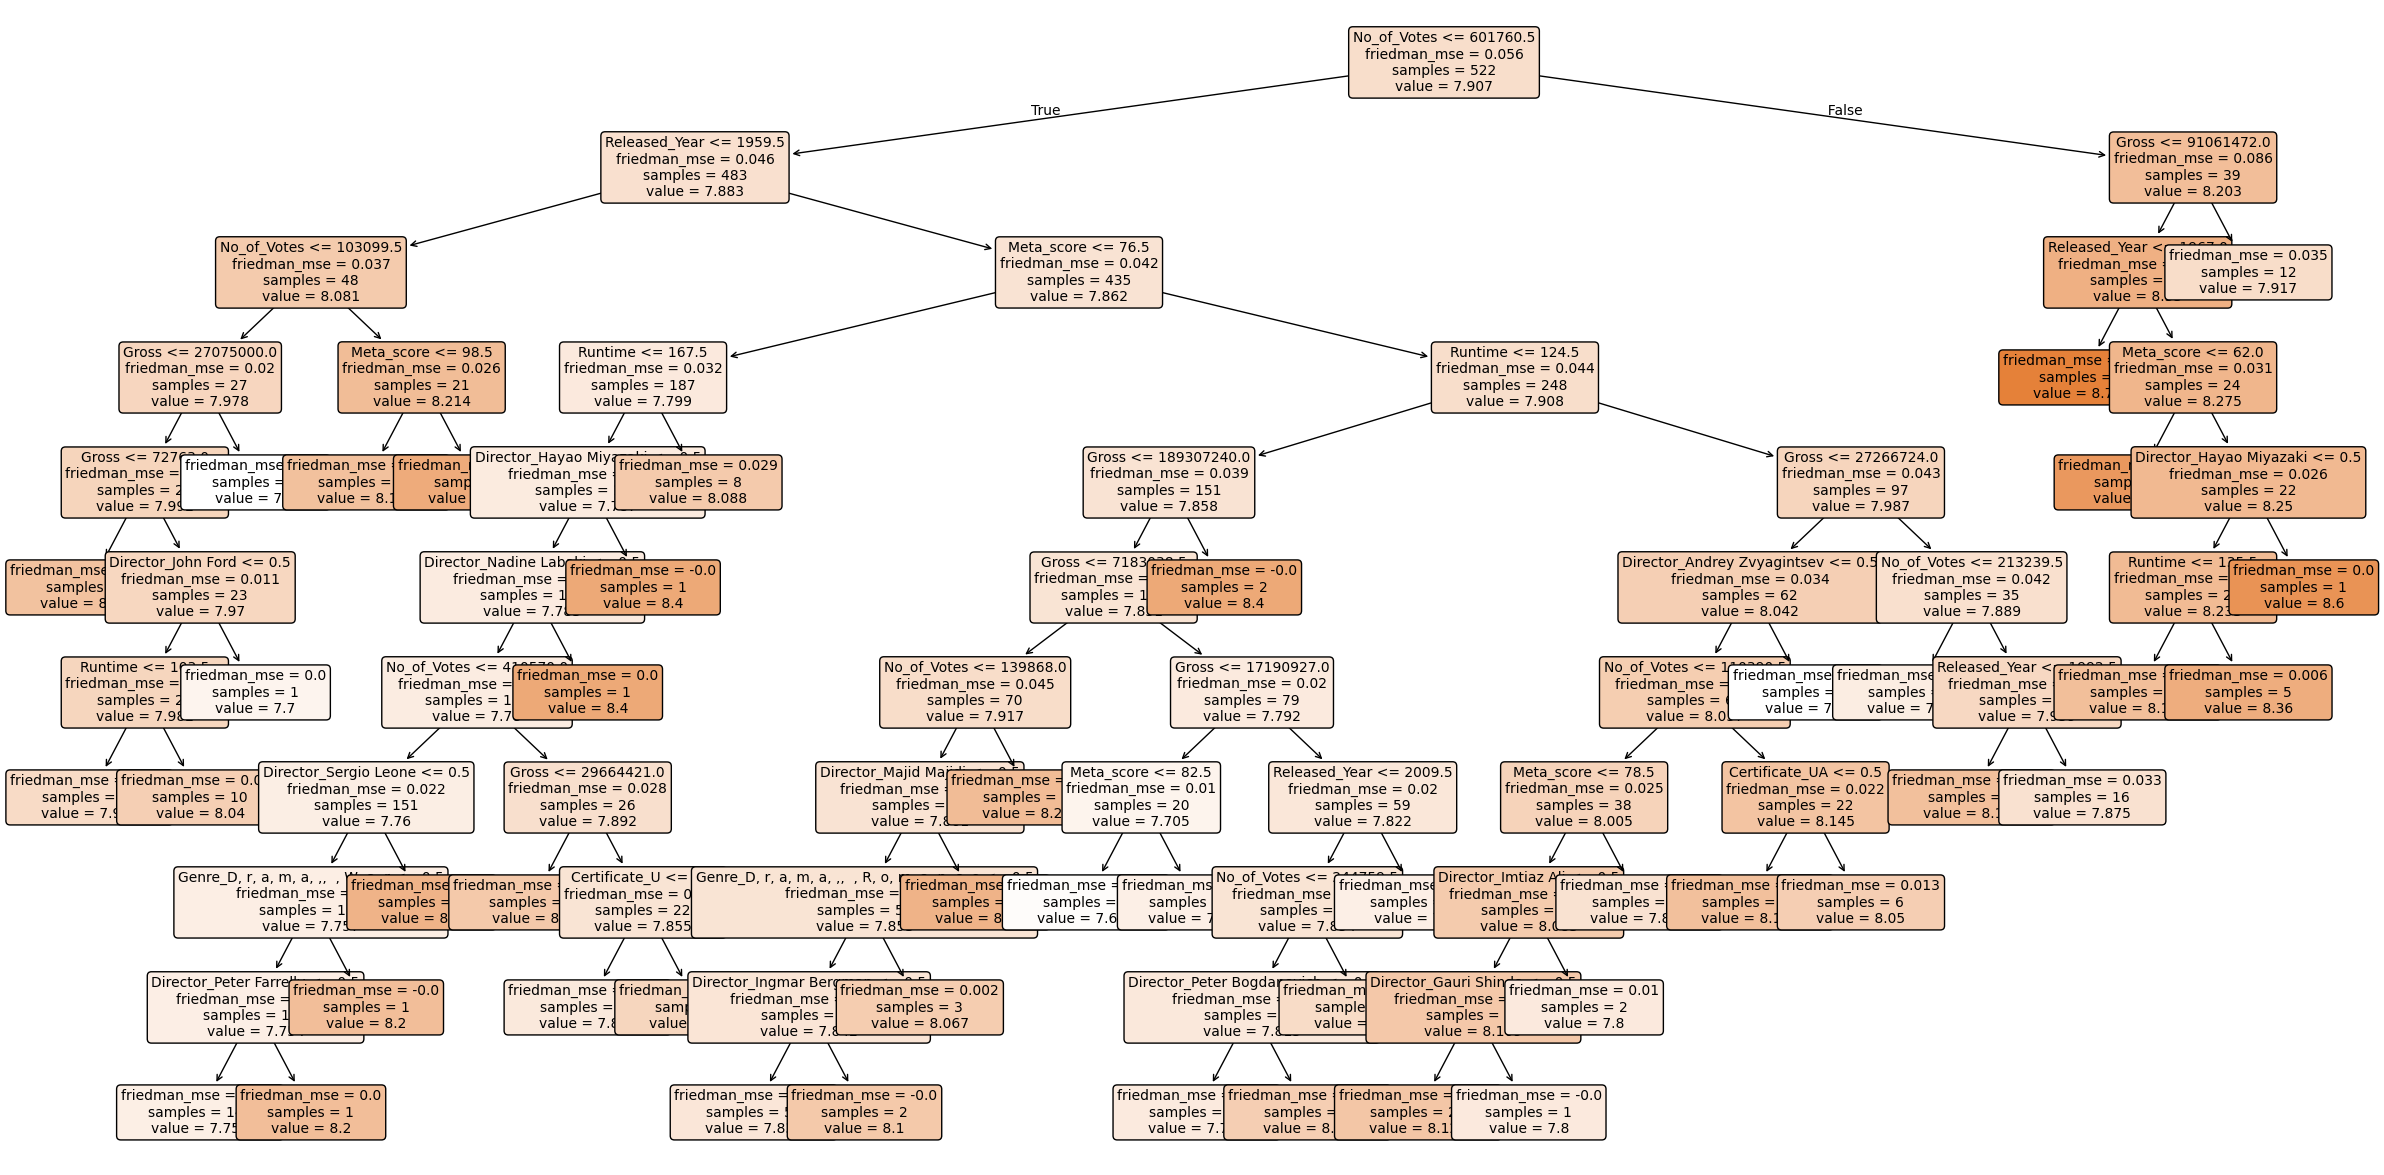

In [71]:
# plotando árvore de decisão
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 15))
plot_tree(best_model,
          filled=True,
          rounded=True,
          feature_names=train_X_clean.columns.tolist(),
          fontsize=10)
plt.savefig("decision_tree.png")

## Prevendo nova nota:
Supondo um filme com as seguintes características:
{'Series_Title': 'The Shawshank Redemption', 'Released_Year': '1994', 'Certificate': 'A', 'Runtime': '142 min', 'Genre': 'Drama', 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.', 'Meta_score': 80.0, 'Director': 'Frank Darabont', 'Star1': 'Tim Robbins', 'Star2': 'Morgan Freeman', 'Star3': 'Bob Gunton', 'Star4': 'William Sadler', 'No_of_Votes': 2343110, 'Gross': '28,341,469'}
Qual seria a nota do IMDB?

In [72]:
# criando dataframe só com as colunas que o modelo usa
# e com os dados já convertidos
filme_data = {
    'Released_Year': 1994,
    'Certificate': 'A',
    'Runtime': 142,
    'Genre': 'Drama',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'No_of_Votes': 2343110,
    'Gross': 28341469.0
}

filme_df = pd.DataFrame([filme_data])

categorical_features = ['Certificate', 'Genre', 'Director']

# transformando feature categóricas
encoded_filme = encoder.transform(filme_df[categorical_features])
encoded_df = pd.DataFrame(encoded_filme, columns=encoder.get_feature_names_out(categorical_features), index=filme_df.index)

# juntando com as numéricas
numeric_features = ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']
filme_processed = pd.concat([filme_df[numeric_features], encoded_df], axis=1)

# ordem das colunas do treino
filme_processed = filme_processed.reindex(columns=train_X_clean.columns, fill_value=0)

# escalonamento
filme_processed[numeric_features] = scaler.transform(filme_processed[numeric_features])

# fazendo a previsão
nota_predita = best_model.predict(filme_processed)[0]

print(f"A nota prevista do filme é: {nota_predita:.2f}")

A nota prevista do filme é: 8.17


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## 5. Salvando modelo
Salve o modelo desenvolvido no formato .pkl

In [74]:
import joblib
import pickle

# salvando tudo num único arquivo
modelo_completo = {
    'model': best_model,
    'encoder': encoder,
    'scaler': scaler,
    'feature_names': train_X_clean.columns.tolist(),
    'categorical_features': categorical_features,
    'numeric_features': ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']
}

joblib.dump(modelo_completo, 'modelo.pkl')
print("modelo completo salvo como 'modelo.pkl'")

modelo completo salvo como 'modelo.pkl'
